## 1、查看FPR的变化趋势 (m,k,n)都会影响到我们的FPR

In [2]:
# IMPORTS
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.style as style
import math

# PLOTTING CONFIG
%matplotlib inline
style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14, 7)
plt.figure(dpi=100)

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

## 1.1 进行FPR的计算

In [3]:
# 对于每一个n，我们可以找到使得fpr<1/3的m和n
def calculateFpr(m,k,n):
    result = (1-(1-1/m)**(k*n))**k
    return result

## 1.2 进行在m取不同值的情况下，查看在不同n下，Fpr随k的变化曲线

### 观察点1：随着k(哈希函数个数)的增大我们的FPR表现出一种先下降后上升的趋势

### 观察点2：随着n(插入元素个数)的增大，我们的FPR都是上升的趋势

### 观察点3：随着m(布隆过滤器数组位数)的增大，会在更远的位置处，才出现随着k的增加出现FPR上升的情况。

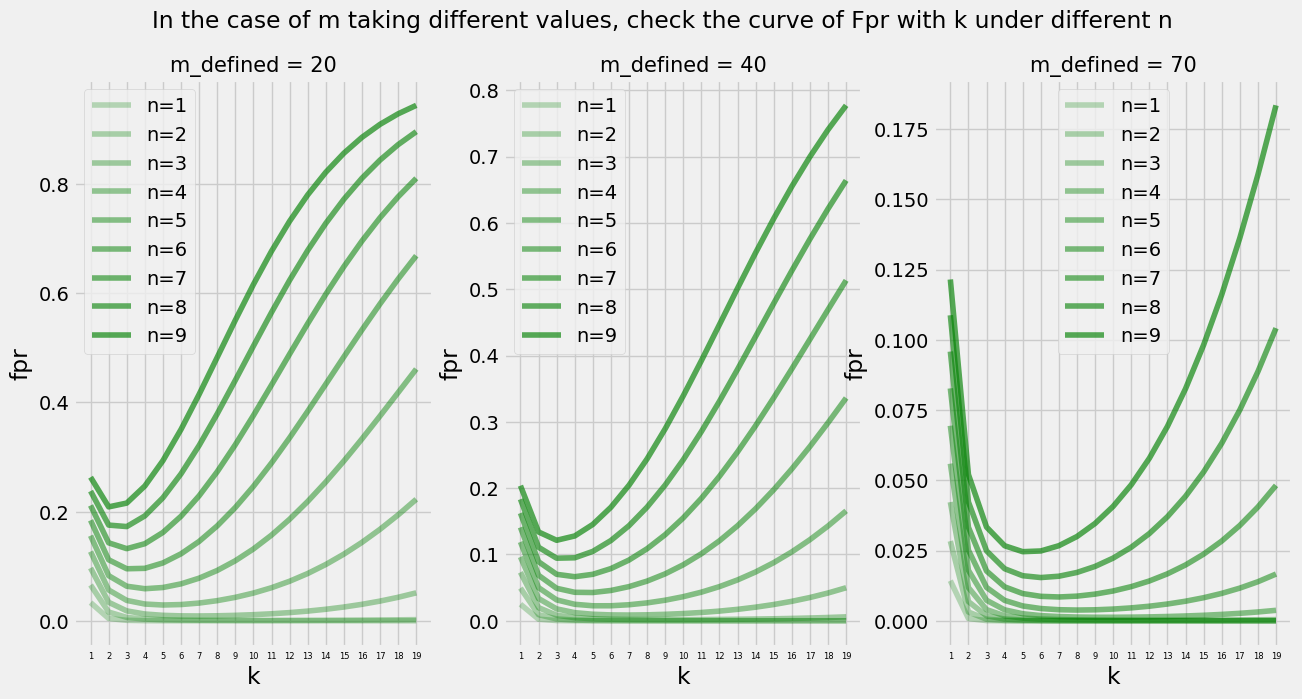

In [4]:
plt.subplot(1,3,1)
m_defined = 30
n_list = np.arange(1,10,1)
index = 1
for n_temp in n_list:
    k_list = np.arange(1,20,1)
    fpr_list = calculateFpr(m_defined,k_list,n_temp)
    plt.plot(k_list,fpr_list,color="g",alpha=index*0.05+0.2,label="n="+str(n_temp))
    index += 1
plt.title("m_defined = 20",fontsize=15);
plt.legend();
plt.xlabel("k");
plt.ylabel("fpr");
plt.xticks(np.arange(1,20,1),fontsize=6);

plt.subplot(1,3,2)
m_defined = 40
n_list = np.arange(1,10,1)
index = 1
for n_temp in n_list:
    k_list = np.arange(1,20,1)
    fpr_list = calculateFpr(m_defined,k_list,n_temp)
    plt.plot(k_list,fpr_list,color="g",alpha=index*0.05+0.2,label="n="+str(n_temp))
    index += 1
plt.title("m_defined = 40",fontsize=15);
plt.legend();
plt.xlabel("k");
plt.ylabel("fpr");
plt.xticks(np.arange(1,20,1),fontsize=6);
plt.suptitle("In the case of m taking different values, check the curve of Fpr with k under different n");

plt.subplot(1,3,3)
m_defined = 70
n_list = np.arange(1,10,1)
index = 1
for n_temp in n_list:
    k_list = np.arange(1,20,1)
    fpr_list = calculateFpr(m_defined,k_list,n_temp)
    plt.plot(k_list,fpr_list,color="g",alpha=index*0.05+0.2,label="n="+str(n_temp))
    index += 1
plt.title("m_defined = 70",fontsize=15);
plt.legend();
plt.xlabel("k");
plt.ylabel("fpr");
plt.xticks(np.arange(1,20,1),fontsize=6);
plt.suptitle("In the case of m taking different values, check the curve of Fpr with k under different n");

# 2. 对于每一个n(插入元素个数)找到一个最合适的m和k

## 2.1 进行冗余转发(单位为bit)的计算

In [6]:
# 在满足使得fpr<1/3的m,k之中，找到使得冗余转发最小的m,k
def calculateRedundantForwarding(c,m,k,n):
    fpr = calculateFpr(m,k,n)
    result = ((-3*(c+m)*(-1+fpr)**3*fpr)/((1-3*fpr)**2)) + m * n
    return result

## 2.2  指定n(插入元素的个数), 找到使得fpr<1/3的合法的m和k,形成一个字典: key为m,value为klist

In [7]:
# 假定n=8
n_defined = 5
# 遍历m从10-20
mlist = np.arange(1,100,5)
# 遍历k从1-10
klist = np.arange(1,10,1)
# 我们准备进行m和k的最优的值的选取
acceptable_m_list = []
acceptable_k_list = []
m_to_k_dict = {}
for i in mlist:
    for j in klist:
        fpr = calculateFpr(i,j,n_defined)
        if fpr < 1/3:
            acceptable_m_list.append(i)
            acceptable_k_list.append(j)
            if i in m_to_k_dict:
                m_to_k_dict[i].append(j)
            else:
                m_to_k_dict[i] = [j]
print(m_to_k_dict)

{16: [1, 2, 3, 4, 5], 21: [1, 2, 3, 4, 5, 6, 7, 8], 26: [1, 2, 3, 4, 5, 6, 7, 8, 9], 31: [1, 2, 3, 4, 5, 6, 7, 8, 9], 36: [1, 2, 3, 4, 5, 6, 7, 8, 9], 41: [1, 2, 3, 4, 5, 6, 7, 8, 9], 46: [1, 2, 3, 4, 5, 6, 7, 8, 9], 51: [1, 2, 3, 4, 5, 6, 7, 8, 9], 56: [1, 2, 3, 4, 5, 6, 7, 8, 9], 61: [1, 2, 3, 4, 5, 6, 7, 8, 9], 66: [1, 2, 3, 4, 5, 6, 7, 8, 9], 71: [1, 2, 3, 4, 5, 6, 7, 8, 9], 76: [1, 2, 3, 4, 5, 6, 7, 8, 9], 81: [1, 2, 3, 4, 5, 6, 7, 8, 9], 86: [1, 2, 3, 4, 5, 6, 7, 8, 9], 91: [1, 2, 3, 4, 5, 6, 7, 8, 9], 96: [1, 2, 3, 4, 5, 6, 7, 8, 9]}


## 2.3 在插入n个元素时,可行的m,k之中,固定一个c,找到使得结果最优的值

### 观察点1:对于不同的c，在同一个n下，拥有不同的最优的m和k

In [8]:
c_defined = 200
finalResult = float('inf')
final_m = 0
final_k = 0
for i in range(len(acceptable_m_list)):
    m_temp = acceptable_m_list[i]
    k_temp = acceptable_k_list[i]
    temp = calculateRedundantForwarding(c_defined,m_temp,k_temp,n_defined)
    if temp < finalResult:
        finalResult = temp
        final_m = m_temp
        final_k = k_temp
print(final_m,final_k,finalResult)

31 4 199.62284977304674


## 2、散点图(使得fpr<1/3的(m,k)对)

Text(0, 0.5, 'k')

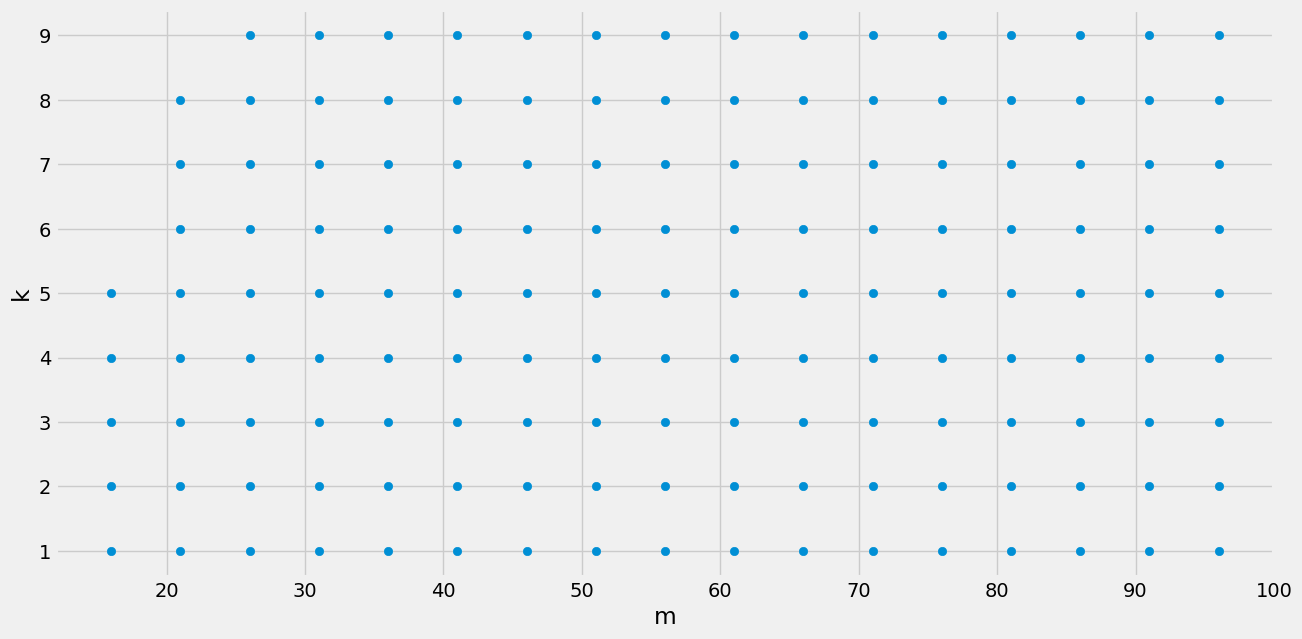

In [9]:
plt.scatter(acceptable_m_list,acceptable_k_list)
plt.xlabel("m")
plt.ylabel("k")

## 3、分析下面这三张图

## 3.1 固定c(数据包大小),固定n(插入元素个数),输入可行的m_to_k这个字典,绘制折线图

### 观察点1: 随着k的增加，一开始整体的开销是在下降的，后面呈现上升的趋势，因为一开始k的参与导致冗余转发的概率的急剧的下降，但是后面k的继续增加导致布隆过滤器中的位都被占用，冗余转发的概率上升，和fpr之中的趋势相同

### 观察点2: 随着k的增加，对于越大的n，和越小的m，都会导致转折点的前移和转折点后的快速上升，但是一开始的k很小的时候m越小对应的冗余转发的开销越小，照着这个情况看，我们应该选择转折点处的k和最小的m。

### 观察点3: 首先给m取一个比较大的值，然后m慢慢变小，一开始冗余转发开销是在下降的，因为m是够的，但是下降到一个转折点，m不够了，fpr开始急剧上升。

In [10]:
def calculateRedundantFowardingWithTraverseK(c_defined,m_to_k_dict,n_defined):
    index = 1
    for key in m_to_k_dict.keys():
        m_temp = key
        tempResultList = []
        for j in m_to_k_dict[key]:
            k_temp = j
            result = calculateRedundantForwarding(c_defined,m_temp,k_temp,n_defined)
            tempResultList.append(result)
        current_alpha = index*0.05+0.2
        if m_temp <= 30:
            plt.plot(m_to_k_dict[key],tempResultList,label="m="+str(m_temp),color="r",alpha=current_alpha)
        else:
            plt.plot(m_to_k_dict[key],tempResultList,label="m="+str(m_temp),color="g",alpha=current_alpha)
        index += 1
    plt.xlabel("k")
    plt.ylabel("redundant forwarding cost")
    plt.title("n="+str(n_defined)+" c="+str(c_defined),fontsize=15)

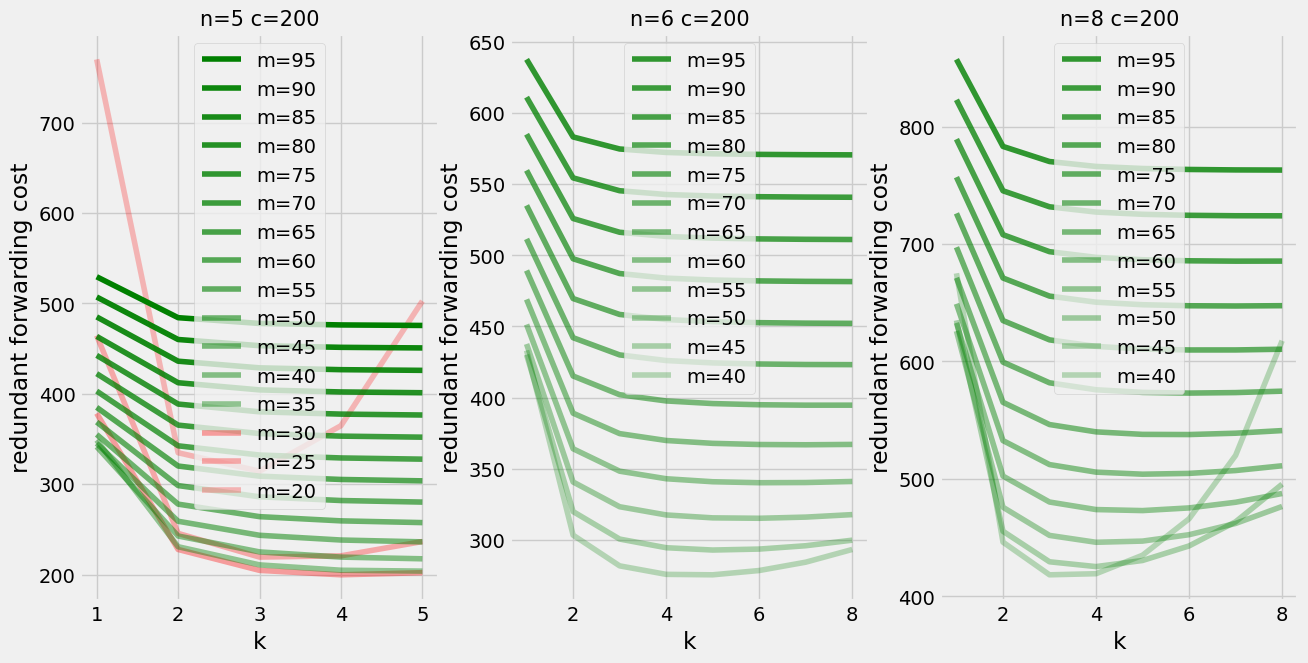

In [11]:
ax1 = plt.subplot(1,3,1)
# 假定n=5
n_defined = 5
# 假定数据包的大为c=200
c_defined = 200
# 遍历m从10-20
mlist = np.arange(20,100,5)
# 遍历k从1-10
klist = np.arange(1,6,1)
# 我们准备进行m和k的最优的值的选取
acceptable_m_list = []
acceptable_k_list = []
m_to_k_dict = {}
for i in mlist:
    for j in klist:
        fpr = calculateFpr(i,j,n_defined)
        if fpr < 1/3:
            acceptable_m_list.append(i)
            acceptable_k_list.append(j)
            if i in m_to_k_dict:
                m_to_k_dict[i].append(j)
            else:
                m_to_k_dict[i] = [j]
calculateRedundantFowardingWithTraverseK(c_defined,m_to_k_dict,n_defined)
handles1,labels1 = ax1.get_legend_handles_labels()
handles1 = reversed(handles1)
labels1 = reversed(labels1)
ax1.legend(handles1,labels1);

ax2 = plt.subplot(1,3,2)
# 假定n=8
n_defined = 6
# 假定数据包的大为c=200
c_defined = 200
# 遍历m从10-20
mlist = np.arange(40,100,5)
# 遍历k从1-10
klist = np.arange(1,9,1)
# 我们准备进行m和k的最优的值的选取
acceptable_m_list = []
acceptable_k_list = []
m_to_k_dict = {}
for i in mlist:
    for j in klist:
        fpr = calculateFpr(i,j,n_defined)
        if fpr < 1/3:
            acceptable_m_list.append(i)
            acceptable_k_list.append(j)
            if i in m_to_k_dict:
                m_to_k_dict[i].append(j)
            else:
                m_to_k_dict[i] = [j]
calculateRedundantFowardingWithTraverseK(c_defined,m_to_k_dict,n_defined)
handles2,labels2 = ax2.get_legend_handles_labels()
handles2 = reversed(handles2)
labels2 = reversed(labels2)
ax2.legend(handles2,labels2);

ax3 = plt.subplot(1,3,3)
# 假定n=8
n_defined = 8
# 假定数据包的大为c=200
c_defined = 200
# 遍历m从10-20
mlist = np.arange(40,100,5)
# 遍历k从1-10
klist = np.arange(1,9,1)
# 我们准备进行m和k的最优的值的选取
acceptable_m_list = []
acceptable_k_list = []
m_to_k_dict = {}
for i in mlist:
    for j in klist:
        fpr = calculateFpr(i,j,n_defined)
        if fpr < 1/3:
            acceptable_m_list.append(i)
            acceptable_k_list.append(j)
            if i in m_to_k_dict:
                m_to_k_dict[i].append(j)
            else:
                m_to_k_dict[i] = [j]
calculateRedundantFowardingWithTraverseK(c_defined,m_to_k_dict,n_defined)
handles3,labels3 = ax3.get_legend_handles_labels()
handles3 = reversed(handles3)
labels3 = reversed(labels3)
ax3.legend(handles3,labels3);

## 3.2 固定c(数据包大小),固定n(插入元素个数),输入可行的m_to_k这个字典,绘制折线图(m作为x轴)

### 观察点1: 一开始冗余转发的开销都随着我们的m的增加而下降，但是经过了一个特定的结点之后，趋势将变为缓慢增长，因为此时的m已经够了，起不到降低冗余转发开销的作用了，这个时候谁的m更大，谁将占据更多的冗余转发开销，并且随着n的增加近一步的加剧

### 观察点2: 越过转折点之后，k越大的冗余转发开销越低，因为m已经足够的大了，而此时进行k的提高能够降低我们的冗余转发开销。

In [12]:
def calculateRedundantFowardingWithTraverseM(c_defined,k_to_m_dict,n_defined):
    index = 1
    for key in k_to_m_dict.keys():
        k_temp = key
        tempResultList = []
        for j in k_to_m_dict[key]:
            m_temp = j
            result = calculateRedundantForwarding(c_defined,m_temp,k_temp,n_defined)
            tempResultList.append(result)
        current_alpha = index*0.075+0.2
        plt.plot(k_to_m_dict[key],tempResultList,label="k="+str(k_temp),color="g",alpha=current_alpha)
        index += 1
    plt.xlabel("m")
    plt.ylabel("redundant forwarding cost")

Text(0.5, 1.0, 'n=6 c=200\n The turning point is between 35-45')

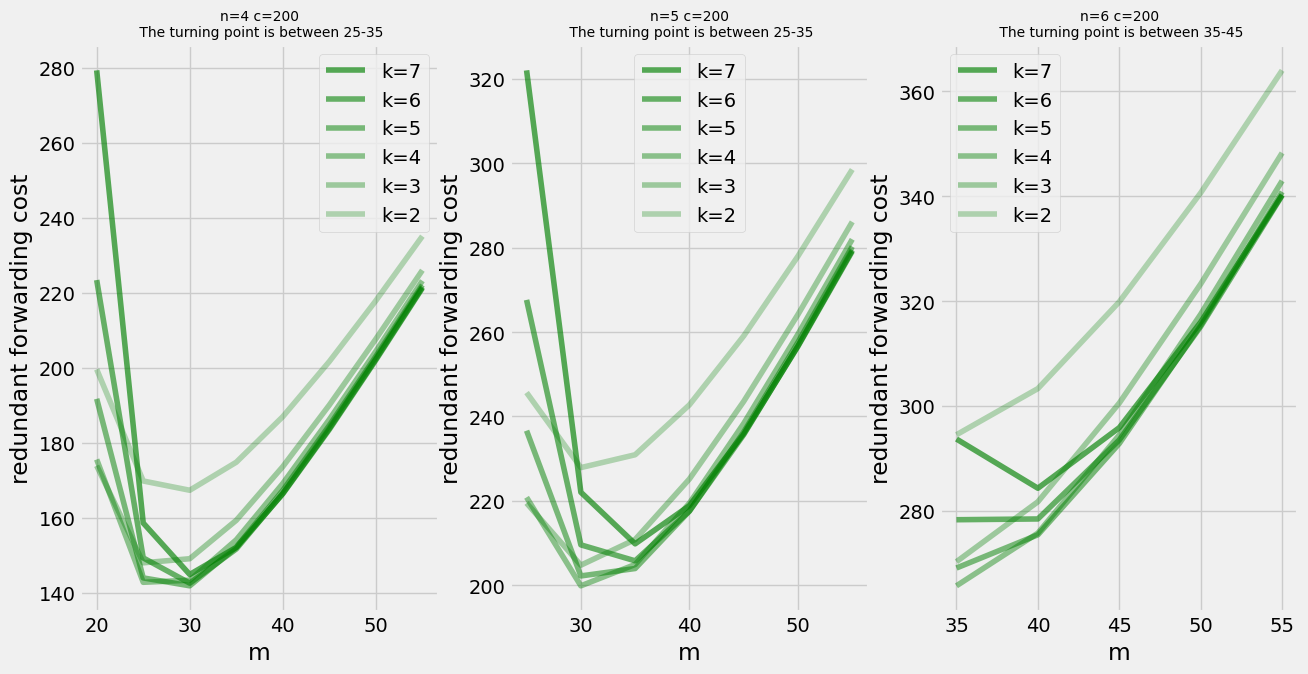

In [13]:
ax1 = plt.subplot(1,3,1)
# 假定n=5
n_defined = 4
# 假定数据包的大为c=100
c_defined = 200
# 遍历m从10-20
mlist = np.arange(20,60,5)
# 遍历k从1-10
klist = np.arange(2,8,1)
# 我们准备进行m和k的最优的值的选取
acceptable_m_list = []
acceptable_k_list = []
k_to_m_dict = {}
for i in klist:
    for j in mlist:
        fpr = calculateFpr(j,i,n_defined)
        if fpr < 1/3:
            acceptable_m_list.append(j)
            acceptable_k_list.append(i)
            if i in k_to_m_dict:
                k_to_m_dict[i].append(j)
            else:
                k_to_m_dict[i] = [j]
calculateRedundantFowardingWithTraverseM(c_defined,k_to_m_dict,n_defined)
handles1,labels1 = ax1.get_legend_handles_labels()
handles1 = reversed(handles1);
labels1 = reversed(labels1);
ax1.legend(handles1,labels1);

plt.title("n="+str(n_defined)+" c="+str(c_defined)+"\n The turning point is between 25-35",fontsize=10)

ax2 = plt.subplot(1,3,2)
# 假定n=5
n_defined = 5
# 假定数据包的大为c=200
c_defined = 200
# 遍历m从10-20
mlist = np.arange(25,60,5)
# 遍历k从1-10
klist = np.arange(2,8,1)
# 我们准备进行m和k的最优的值的选取
acceptable_m_list = []
acceptable_k_list = []
k_to_m_dict = {}
for i in klist:
    for j in mlist:
        fpr = calculateFpr(j,i,n_defined)
        if fpr < 1/3:
            acceptable_m_list.append(j)
            acceptable_k_list.append(i)
            if i in k_to_m_dict:
                k_to_m_dict[i].append(j)
            else:
                k_to_m_dict[i] = [j]
calculateRedundantFowardingWithTraverseM(c_defined,k_to_m_dict,n_defined)
handles2,labels2 = ax2.get_legend_handles_labels()
handles2 = reversed(handles2);
labels2 = reversed(labels2);
ax2.legend(handles2,labels2);

plt.title("n="+str(n_defined)+" c="+str(c_defined)+"\n The turning point is between 25-35",fontsize=10)

ax3 = plt.subplot(1,3,3)
# 假定n=5
n_defined = 6
# 假定数据包的大为c=200
c_defined = 200
# 遍历m从10-20
mlist = np.arange(35,60,5)
# 遍历k从1-10
klist = np.arange(2,8,1)
# 我们准备进行m和k的最优的值的选取
acceptable_m_list = []
acceptable_k_list = []
k_to_m_dict = {}
for i in klist:
    for j in mlist:
        fpr = calculateFpr(j,i,n_defined)
        if fpr < 1/3:
            acceptable_m_list.append(j)
            acceptable_k_list.append(i)
            if i in k_to_m_dict:
                k_to_m_dict[i].append(j)
            else:
                k_to_m_dict[i] = [j]
calculateRedundantFowardingWithTraverseM(c_defined,k_to_m_dict,n_defined)
handles3,labels3 = ax3.get_legend_handles_labels()
handles3 = reversed(handles3);
labels3 = reversed(labels3);
ax3.legend(handles3,labels3);

plt.title("n="+str(n_defined)+" c="+str(c_defined)+"\n The turning point is between 35-45",fontsize=10)

Text(0, 0.5, 'k')

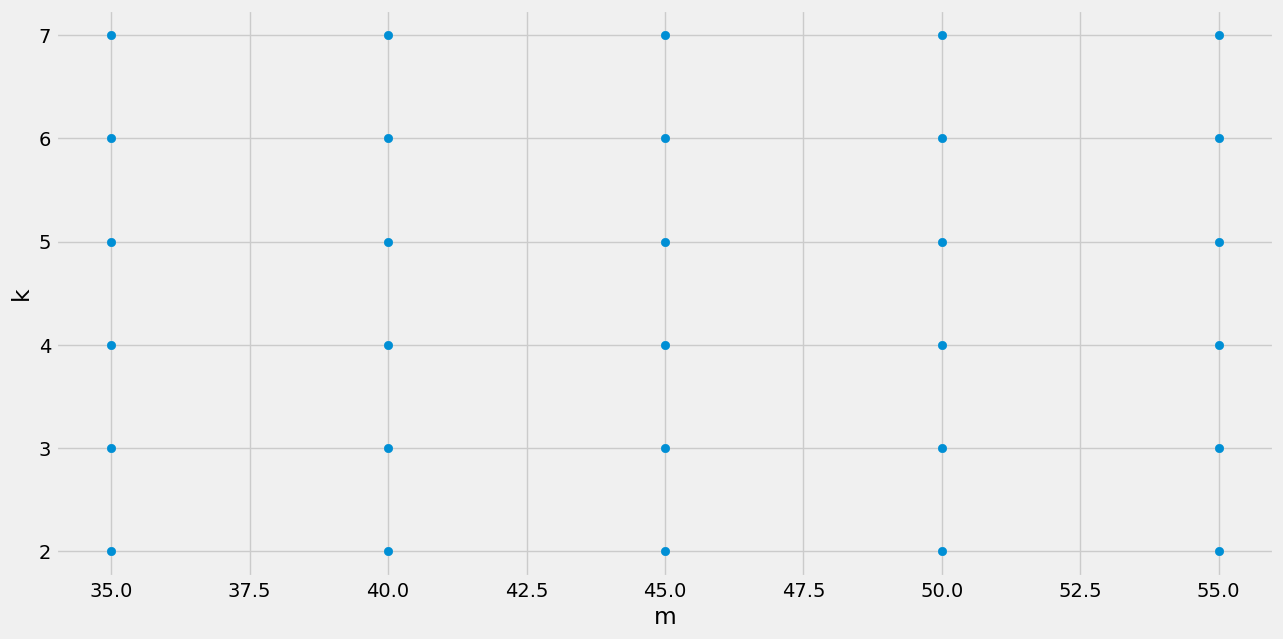

In [14]:
plt.scatter(acceptable_m_list,acceptable_k_list)
plt.xlabel("m")
plt.ylabel("k")

# 3.固定k,对于一个变化的n,找到一个最优的m

In [22]:
def calculateRedundantFowardingWithTraverseN(k_defined,nlist,mlist,clist):
    # 首先我们进行n的遍历
    for c_temp in clist:
        plot_m_list = []
        plot_cost_list = []
        plot_n_list = []
        for n_temp in nlist:
            m_star = -1
            cost_star = -10
            lowestRedundantForwarding = float('inf')
            for m_temp in mlist:
                fpr = calculateFpr(m_temp,k_defined,n_temp)
                # 说明是可行的fpr
                if fpr < 1/3:
                    # 这个时候我们准备进行的是当前情况下的最优的m的计算
                    # c,m,k,n
                    currentRedundantForwarding = calculateRedundantForwarding(c_temp,m_temp,k_defined,n_temp)
                    if currentRedundantForwarding < lowestRedundantForwarding:
                        lowestRedundantForwarding = currentRedundantForwarding
                        m_star = m_temp
            plot_cost_list.append(lowestRedundantForwarding)
            plot_n_list.append(n_temp)
        plt.plot(plot_n_list,plot_cost_list,label="c="+str(c_temp))
        plt.xlabel("n")
        plt.ylabel("m*")
        plt.xticks(np.arange(5,10))
    plt.legend();
    plt.title("for each n find the best m* in k_defined = " + str(k_defined))

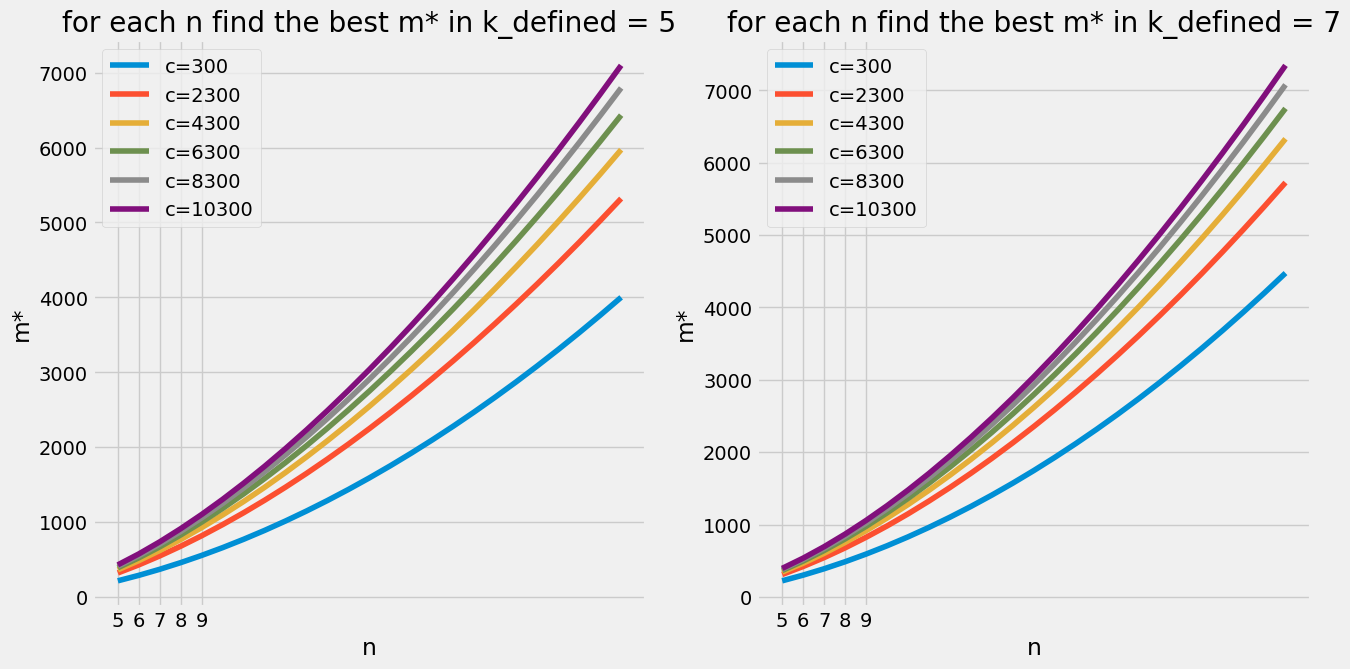

In [25]:
plt.subplot(1,2,1)
k_defined = 5
nlist = np.arange(5,30)
mlist = np.arange(1,300)
clist = np.arange(300,12000,2000)
calculateRedundantFowardingWithTraverseN(k_defined,nlist,mlist,clist)

plt.subplot(1,2,2)
k_defined = 7
nlist = np.arange(5,30)
mlist = np.arange(1,300)
clist = np.arange(300,12000,2000)
calculateRedundantFowardingWithTraverseN(k_defined,nlist,mlist,clist)

# 4.将冗余转发的前面和后面进行分离的操作

In [46]:
def frontPartOfRedundantForwarding(c,m,k,n):
    fpr = calculateFpr(m,k,n)
    result = ((-3*(c+m)*(-1+fpr)**3*fpr)/((1-3*fpr)**2))
    return result

In [47]:
def backPartOfRedundantForwarding(m,n):
    result = m * n
    return result

In [63]:
c = 200
m = np.arange(1,100)
k = 5
n = 10

In [57]:
minvalue = float("inf")
min_m = -1
for i in range(1,100):
    temp = calculateRedundantForwarding(c,i,k,n)
    fpr = calculateFpr(i,k,n)
    # 说明是可行的fpr
    if fpr < 1/3:
        if temp < minvalue:
            minvalue = temp
            min_m = i
print(min_m)

50


In [73]:
def fixedMandNwithTraverseN(c_defined,n_defined,m_list,k_defined):
    frontPartRedundantForwardingCost = []
    backPartRedundantForwardingCost = []
    resonable_m = []
    for m_temp in mlist:
        fpr = calculateFpr(m_temp,k_defined,n_defined)
        # 说明是可行的fpr
        if fpr < 1/3:
            front = frontPartOfRedundantForwarding(c_defined,m_temp,k_defined,n_defined)
            back = backPartOfRedundantForwarding(m_temp,n_defined)
            frontPartRedundantForwardingCost.append(front)
            backPartRedundantForwardingCost.append(back)
            resonable_m.append(m_temp)
    plt.plot(resonable_m,frontPartRedundantForwardingCost,label="front part cost")
    plt.plot(resonable_m,backPartRedundantForwardingCost,label="back part cost")
    plt.title("traverse m with fixed c,n,k to see the two parts of the cost")
    plt.xlabel("m")
    plt.ylabel("redundant forwarding cost")
    plt.legend()

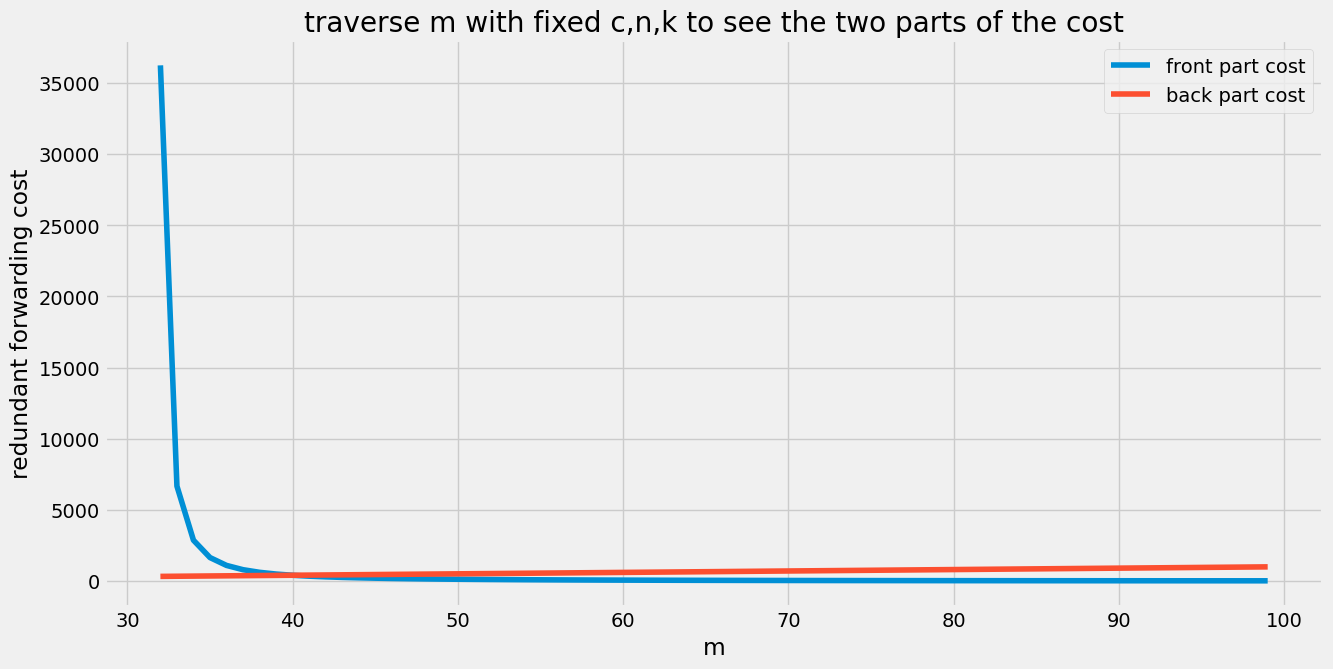

In [74]:
fixedMandNwithTraverseN(c,n,mlist,k)